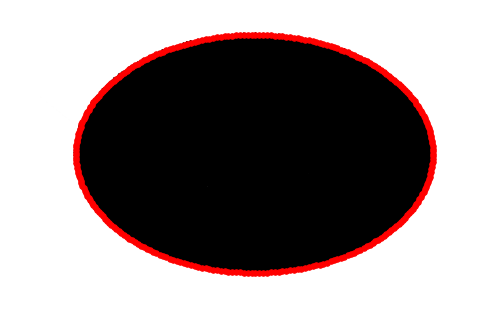

Monte Carlo Pageranks:  [0.0, 0.003105590062111801, 0.0, 0.05062111801242236, 0.014285714285714285, 0.0, 0.00031055900621118014, 0.0, 0.0009316770186335404, 0.0, 0.0, 0.00031055900621118014, 0.0, 0.0, 0.0, 0.0009316770186335404, 0.0, 0.0, 0.0, 0.0, 0.002484472049689441, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015527950310559005, 0.0, 0.0, 0.00031055900621118014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016770186335403725, 0.0, 0.0, 0.016149068322981366, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10652173913043478, 0.0, 0.0, 0.04192546583850932, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003105590062111801, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00031055900621118014, 0.0, 0.0968944099378882, 0.0006211180124223603, 0.016459627329192546, 0.00031055900621118014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009627329192546583, 0.0, 0.0, 0.0, 0.0, 0.003105590062111801, 0.0, 0.0, 0.0, 0.0018633540372670807, 0.0, 0.0, 0.0, 0.0, 0.0009316770186335404, 0.0, 0.0, 0.0, 0.0083

In [6]:
"""
The code below opens the trustchain data set and and runs the Monte Carlo page rank algorithm on a graph generated
from all transactions blocks, where nodes correspond to peers and edge weights to net flows of data in between peers.
The execution of the entire code takes roughly 120 seconds. Loading the data set only needs to be done once. Thereafter
the page ranks are computed incrementally upon changes in the graph.
"""
from __future__ import division
from Open_Database2 import GraphReduction2
from Page_Rank2 import IncrementalPersonalizedPageRank2
import networkx as nx
import matplotlib.pyplot as plt
import random
import time
import numpy as np


start_time = time.time()
file_path = "C:\\Users\\alexa\\Documents\\TU Delft\\Course material\\Other\\Blockchain\\Blockchain Lab\\Incremental Pagerank\\"
file_name = "trustchain"

gr = GraphReduction2(file_path, file_name)
gr.open_data_set()
graph = gr.generate_graph()
nx.draw_shell(graph, node_size=30, edge_width=1)
plt.show()

node = random.choice(gr.nodes)
pr = IncrementalPersonalizedPageRank2(graph, node, 300, 0.05)
pr.initial_random_walks()
page_ranks = pr.compute_personalized_page_ranks()
page_ranks_2 = nx.pagerank(graph, alpha=0.95, personalization={node: 1},
                           max_iter=500, weight='weight')
print "Monte Carlo Pageranks: ", page_ranks.values()
print "Power Iteration Pageranks: ", page_ranks_2.values()
print np.linalg.norm(np.array(page_ranks.values()) - np.array(page_ranks_2.values())) / \
      np.linalg.norm(page_ranks_2.values())

finish_time = time.time()

print finish_time - start_time, " Seconds"


In [9]:
print graph.nodes()

['4c69624e61434c504b3aa81a4535e80e559304a839a3143a85d1743f84c9152253c2a1a63dddece41c0af6760c6a3771a442edffb6bc77ac0d7b6745fadeb08d059bac48834f4a5aa2e9', '4c69624e61434c504b3adb2f4f7210d6e1badf76546ca74cdabffa6e20e8d0a27a26d899a5344f090c5836e50088545ee901fb4db8fa4f00b19cd988a7530eae6ce100ca5e692502e936', '4c69624e61434c504b3a7ab97e8e757cc3fff9fd6729b4489952864c4cd7269bf40d4d068ae5b732c554ab7af85782599177973496a7a36a042074b7eec3f9fde4f73d48df9e54284166', '4c69624e61434c504b3ada278225d6916e43f2e6da78fea4132772d2df95d901e84bbf64385f3a562a69804d520a6b5b2eb1bd87c58aeca1355a44bece2a9b99c78be715cd3570f93ecf', '4c69624e61434c504b3a625380820d1a76e5c0c4b7057e2dddf56e0ffee76a998d6ac5596e16f462e9382d0092886699c166d07a713f5d039f407ea1c9c91ada17c0e28fa94f5148cc0d', '4c69624e61434c504b3ae90604b600617d72e034db836575aba953cb28ba0d3fee20659384a45d722b773773d8c165e6488541d7d96c03d25c54f397b40dba4dcafdc91ce9bf7d2f7210', '4c69624e61434c504b3a099bab058bc921ceb2974af7db2c68d3b2b328f130666554721fd4f9d415275e7c

In [10]:
print len(graph.nodes())

289


In [11]:
print graph[graph.nodes[0]][graph.nodes[1]]

KeyError: 0

In [14]:
print graph[list(graph.nodes)[0]][list(graph.nodes)[3]]

KeyError: '4c69624e61434c504b3ada278225d6916e43f2e6da78fea4132772d2df95d901e84bbf64385f3a562a69804d520a6b5b2eb1bd87c58aeca1355a44bece2a9b99c78be715cd3570f93ecf'